In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%%bash
ls /Users/Nathan/Desktop/West\ Nile\ data

spray.csv
test.csv
train.csv
weather.csv


In [3]:
raw_train_data = pd.read_csv("/Users/Nathan/Desktop/West Nile data/train.csv")
raw_spray_data = pd.read_csv("/Users/Nathan/Desktop/West Nile data/spray.csv")
raw_weather_data = pd.read_csv("/Users/Nathan/Desktop/West Nile data/weather.csv")

raw_training_data = pd.read_csv("/Users/Nathan/Desktop/West Nile data/test.csv")

In [4]:
train_data = raw_train_data.copy()
spray_data = raw_spray_data.copy()
weather_data = raw_weather_data.copy()

In [5]:
train_data[train_data["WnvPresent"] == 1]["Species"].value_counts()

CULEX PIPIENS/RESTUANS    262
CULEX PIPIENS             240
CULEX RESTUANS             49
Name: Species, dtype: int64

In [6]:
spray_data.index = pd.to_datetime(spray_data["Date"].values)
spray_data.drop("Date", axis = 1, inplace = True)
spray_data.sort_index(inplace = True)

(array([ 3038.,  1195.,     0.,     0.,  2809.,  2202.,     0.,  1587.,
         1607.,  2397.]),
 array([  5. ,   7.4,   9.8,  12.2,  14.6,  17. ,  19.4,  21.8,  24.2,
         26.6,  29. ]),
 <a list of 10 Patch objects>)

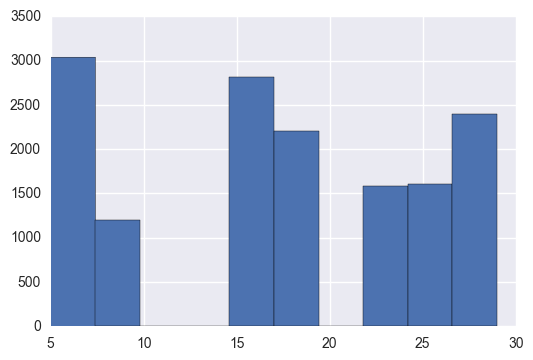

In [7]:
# day since last spraying
plt.hist(x = spray_data.index.day, bins = 10)

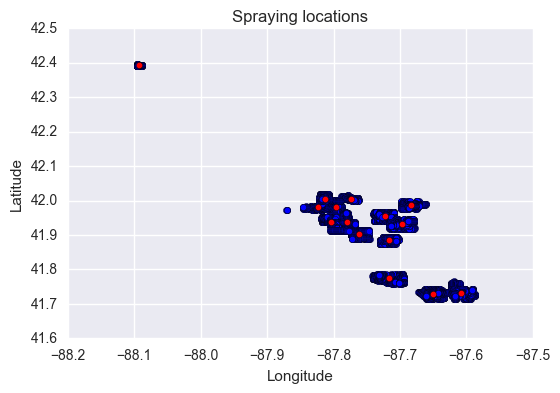

In [8]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

kmeans = KMeans(n_clusters=15)
kmeans.fit(X = spray_data[["Longitude", "Latitude"]])
spraying_centroids = kmeans.cluster_centers_


plt.scatter(spray_data["Longitude"], spray_data["Latitude"])
plt.title("Spraying locations")

plt.scatter(spraying_centroids.T[0], spraying_centroids.T[1], c = 'r', s = 20)
plt.title("Spraying locations")

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

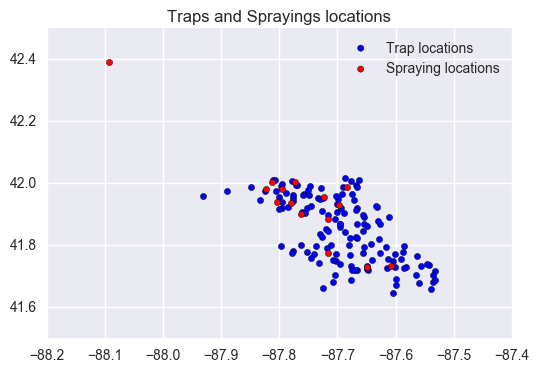

In [9]:
plt.scatter(raw_train_data[["Trap", "Latitude", "Longitude"]].groupby("Trap").mean()["Longitude"], raw_train_data[["Trap", "Latitude", "Longitude"]].groupby("Trap").mean()["Latitude"])

plt.scatter(spraying_centroids.T[0], spraying_centroids.T[1], c = 'r', s = 20)
plt.title("Spraying locations")

plt.legend(["Trap locations", "Spraying locations"])
plt.title("Traps and Sprayings locations")
plt.show()

In [10]:
train_data.drop(labels = ["Address", "Block", "Street"], axis = 1, inplace = True)

In [11]:
# color_mapping = {0: 'w', 1: 'r'}

# lons = train_data["Longitude"].tolist()
# lats = train_data["Latitude"].tolist()

# from mpl_toolkits.basemap import Basemap

# m = Basemap(resolution='h',projection='merc', 
#               llcrnrlat=41.5,urcrnrlat=42.2,
#               llcrnrlon=-88,urcrnrlon=-87.5)

# x, y = m(lons, lats)
# m.scatter(x, y, c = train_data["WnvPresent"].map(color_mapping))

# m.drawcoastlines()
# m.drawstates()
# m.fillcontinents(alpha = 0.5, lake_color="b")


# plt.title("Location for traps and West Nile instances")

# plt.show()

In [12]:
# train_data.to_csv("~/Desktop/train_data.csv")

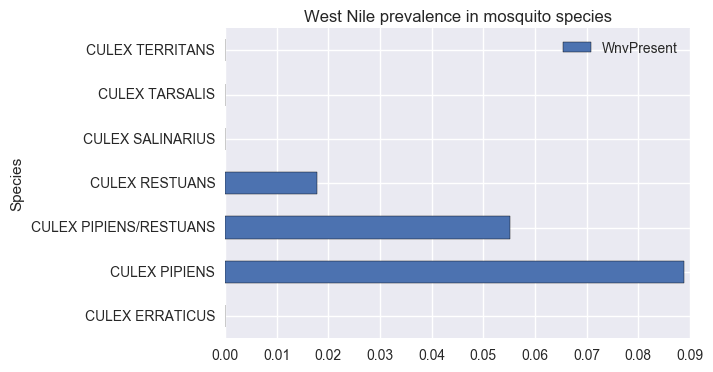

,WnvPresent
Species,
CULEX ERRATICUS,0.000000
CULEX PIPIENS,0.088922
CULEX PIPIENS/RESTUANS,0.055135
CULEX RESTUANS,0.017883
CULEX SALINARIUS,0.000000
CULEX TARSALIS,0.000000
CULEX TERRITANS,0.000000


In [13]:
west_nile_prevalence_by_species_df = train_data[["Species", "WnvPresent"]]
west_nile_prevalence_by_species_df.groupby(by = "Species").mean().plot(kind = 'barh')
plt.title("West Nile prevalence in mosquito species")
plt.show()


west_nile_prevalence_by_species_df.groupby(by = "Species").mean()

In [14]:
west_nile_prevalence_by_species_df.loc[:, "Species"] = west_nile_prevalence_by_species_df["Species"].astype('category')

X = pd.get_dummies(west_nile_prevalence_by_species_df, columns = ["Species"]).drop("WnvPresent", axis = 1)
y = west_nile_prevalence_by_species_df["WnvPresent"]

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

logreg_cv = LogisticRegressionCV(cv = 5)
logreg_cv.fit(X, y)

predictions = logreg_cv.predict(X)
confusion_matrix(y, predictions)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[9955,    0],
       [ 551,    0]])

In [15]:
west_nile_prevalence_by_species_df[west_nile_prevalence_by_species_df["WnvPresent"] == 1].shape[0]

551

In [16]:
# for row in range(len(train_data.index) - 1):
#     if (train_data.ix[row, "Date"] == train_data.ix[row + 1, "Date"]) and (train_data.ix[row, "Trap"] == train_data.ix[row + 1, "Trap"]):
#         # If two adjacent rows have the same Date and Trap ID, 
#         # make each NumMosquitos value the sum, so we can aggregate by averaging later 
#         train_data.ix[row, "NumMosquitos"] += train_data.ix[row + 1, "NumMosquitos"]
#         train_data.ix[row + 1, "NumMosquitos"] = train_data.ix[row, "NumMosquitos"]

# train_data.drop_duplicates()#inplace = True)

In [17]:
weather_data["Date"] = weather_data["Date"].apply(pd.to_datetime)
weather_data["Tavg"] = weather_data["Tavg"].apply(pd.to_numeric, errors = 'coerce')

In [18]:
weather_data.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [19]:
weather_stations_dictionary = {
    1: {"name": "CHICAGO O'HARE INTERNATIONAL AIRPORT", "Latitude": 41.995, "Longitude": -87.933},
    2: {"name": "CHICAGO MIDWAY INTERNATIONAL AIRPORT", "Latitude": 41.786, "Longitude": -87.752}
}

In [20]:
print(train_data.ix[0, ["Latitude", "Longitude"]])
weather_stations_dictionary[1]

Latitude     41.9547
Longitude    -87.801
Name: 0, dtype: object


{'Latitude': 41.995,
 'Longitude': -87.933,
 'name': "CHICAGO O'HARE INTERNATIONAL AIRPORT"}

### distance to previous outbreak

In [21]:
outbreaks = train_data[train_data["WnvPresent"] == 1].loc[:, ["Date", "Latitude", "Longitude"]]
outbreaks.index = outbreaks["Date"].apply(pd.to_datetime).values
outbreaks.drop(labels = "Date", axis = 1, inplace = 1)

outbreaks_color_map = dict.fromkeys(set(outbreaks.index.year))
outbreaks_color_map[2007] = "r"
outbreaks_color_map[2009] = "y"
outbreaks_color_map[2011] = "g"
outbreaks_color_map[2013] = "b"

outbreak_kmeans = KMeans(n_clusters=2)
outbreak_kmeans.fit(X = outbreaks)
outbreak_centroids = outbreak_kmeans.cluster_centers_

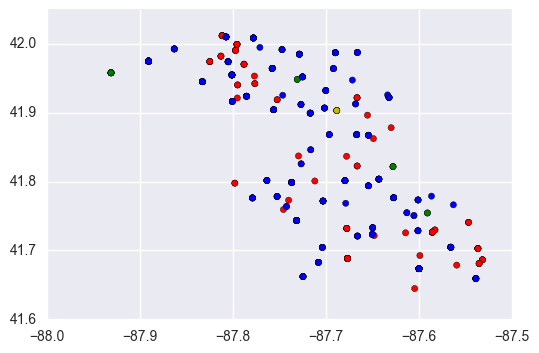

In [22]:

plt.scatter(outbreaks["Longitude"], 
            outbreaks["Latitude"], 
            c = pd.Series(outbreaks.index.year).map(outbreaks_color_map))
plt.show()

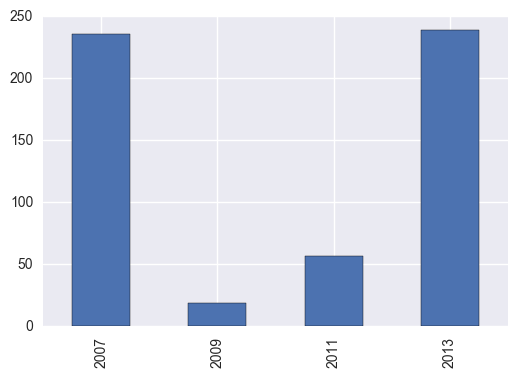

In [23]:
outbreaks.groupby(by = outbreaks.index.year).count().mean(axis = 1).plot(kind = "bar")

In [24]:
spray_data


,Time,Latitude,Longitude
2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29,6:57:38 PM,42.390410,-88.088858
2011-08-29,6:57:48 PM,42.390395,-88.088315
2011-08-29,6:57:58 PM,42.390673,-88.088002
2011-08-29,6:58:08 PM,42.391027,-88.088002
2011-08-29,6:58:18 PM,42.391403,-88.088003
2011-08-29,6:58:28 PM,42.391718,-88.087995
